In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('seaborn')
import pickle
import re

In [2]:
df_train = pd.read_csv("df_train.csv")
df_test = pd.read_csv("df_test.csv")

df_train = df_train.replace({"type":1},0)
df_train = df_train.replace({"type":2},1)
df_train = df_train.replace({"type":3},2)
df_train = df_train.replace({"type":5},3)
df_train = df_train.replace({"type":6},4)
df_train = df_train.replace({"type":7},5)

df_test = df_test.replace({"type":1},0)
df_test = df_test.replace({"type":2},1)
df_test = df_test.replace({"type":3},2)
df_test = df_test.replace({"type":5},3)
df_test = df_test.replace({"type":6},4)
df_test = df_test.replace({"type":7},5)


X = df_train.to_numpy()[:,:-1]
y = df_train.to_numpy()[:,-1:]


X_test = df_test.to_numpy()[:,:-1]
y_test = df_test.to_numpy()[:,-1:]

# M0-EDA

## Preliminary EDA

For the EDA we started by checking the dymensions and distribution of our dataset. From our preliminary EDA we found the data set to be quite small and sparse. 

* insert plot here *

When looking at a histogram of the class distributions, we see that they're quite uneven aswell. A data set with the dimensions of (200,9) is not neccesarily ideal for a 6 class classification. This might be compounded by the uneven distribution of the dataset as there is a higher risk for overfitting, when validation our models on an subsection of an already small dataset. There are ways of of combating this tendency towards overfitting though. 

## K-folds crossvalidation

K-folds crossvalidation splits the dataset into K folds. It then goes through each split, using it as a validation set for the model and then generates K scores. We can then calculate the mean and variance of the scores to see how the model perfomed. This approach helps when we try to find the right hyperparameters for our models. It makes it less likely to choose a model that is biased towards the validation set. This is especially important with small, sparse and unevenly distributed datasets, as you're less likely to make a split in the dataset that lessens the datas integrity or even worse, completely omits a class. The amount of folds can also be treated as a hyperparameter, but the variance tends to get higher when introducing more folds when dealing with smaller datasets. 

## LDA plots

The next thing we wanted to find out about our data is how the data is clustered. As we're using LDA as a classifications algorithm, we can plot the dimensionality reduction performed. We do this to both get a sence of what our results might be, but also to get a general idea of which classes might be more clustered or correlated with eachother. The LDA projection maximizes the seperation of our classes, so it should be able to show with accuracy how seperable our classes are from eachother. 

* Insert plot here * 

We can see from the projection, that the window classes are very clustered, which points toward the chemical makeup being very similar. This might be intuative as window glass has very similar attributes, being clearly seethrough, somewhat insulating and quite sturdy. When looking at the rest of our classes they are somewhat clustered, but they are very sparse and have some outlier values. This tells us that window classes might be harder to accuratly classify, and will have a lower precision, recall and f1 score, due to the clustering. The rest of the classes might be easier to classify if the model can take into acount their low frequency in the dataset. Anything naive-baise might have a hard time with this though. 

(array([49.,  0., 53.,  0., 12.,  0.,  9.,  0.,  6., 20.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

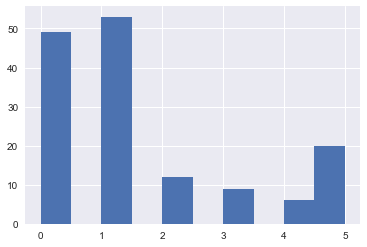

In [8]:
plt.hist(df_train["type"])

In [6]:
df_train["type"].value_counts()

1    53
0    49
5    20
2    12
3     9
4     6
Name: type, dtype: int64

In [ ]:
df_test[""]